# I2AI Experience

## Fundamentos de Inteligência Artificial

## By Alexandre Dietrich

#### Image Classification with Deep Learning

#### Dataset: MNIST

#### Date: 16/11/20

## Tools
### Python, Numpy, Matplotlib, Keras and TensorFlow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

# 2 - Data Phase

## Collect Data

In [2]:
(X_train_images, Y_train_labels), (X_test_images, Y_test_labels) = mnist.load_data()

## Explore and Analyze Data

In [3]:
print(X_train_images.ndim)

3


In [4]:
print(X_train_images.shape)

(60000, 28, 28)


In [5]:
print(X_train_images.dtype)

uint8


           Label =  9


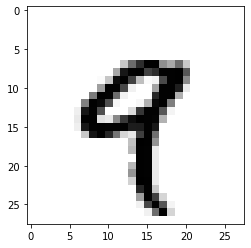

In [6]:
digit = X_train_images[4]

print('           Label = ', Y_train_labels[4])

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

           Label =  3


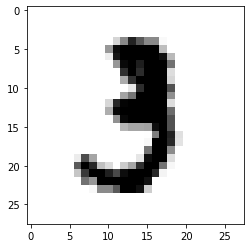

In [7]:
digit = X_train_images[10]

print('           Label = ', Y_train_labels[10])

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Clean and Transform Data

<div align="left">
<img src="images/MNIST data transformation.png" alt="Drawing" style="width: 600px;"/>
</div>

In [8]:
X_test_images_orig = X_test_images

X_train_images = X_train_images.reshape((60000, 28 * 28))
X_train_images = X_train_images.astype('float32') / 255
X_test_images = X_test_images.reshape((10000, 28 * 28))
X_test_images = X_test_images.astype('float32') / 255

# 3 - Modelling/Training Phase

## Define Neural Network Model Architecture

In [9]:
model = models.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')])

<div align="left">
<img src="images/NN Architecture.png" alt="Drawing" style="width: 600px;"/>
</div>

## Define Hyperparameters

<div align="left">
<img src="images/Compile.png" alt="Drawing" style="width: 600px;"/>
</div>

In [10]:
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Train Neural Network Model

<div align="left">
<img src="images/Training loop.png" alt="Drawing" style="width: 600px;"/>
</div>

In [11]:
history = model.fit(X_train_images, Y_train_labels, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3491 - acc: 0.9201
Epoch 2/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1452 - acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1270 - acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1157 - acc: 0.97810s - loss: 0.1135 - acc:
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1021 - acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0958 - acc: 0.9832
Epoch 7/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0975 - acc: 0.9851
Epoch 8/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0898 - acc: 0.9871
Epoch 9/20
60000/60000 [==============================] - ETA: 0s - loss: 0.0875 - acc: 0.987 - 2s 30us/sample - loss: 0.0866 - acc: 0.9878
Epoch 10/20
60000/60

<div align="left">
<img src="images/After training.png" alt="Drawing" style="width: 600px;"/>
</div>

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  401920    
_________________________________________________________________
dense_1 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Evaluate Model

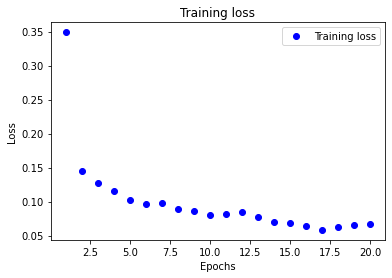

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test Trained Model Before Production Deployment

<div align="left">
<img src="images/MNIST Trained model.png" alt="Drawing" style="width: 600px;"/>
</div>

In [18]:
results = model.evaluate(X_test_images, Y_test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.2233 - acc: 0.9795


In [19]:
test_digits = X_test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

      Predicted Label =  7


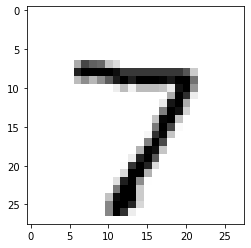

In [16]:
row = 0 
digit = X_test_images_orig[row]

print('      Predicted Label = ', np.argmax(predictions[row]))

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

      Predicted Label =  4


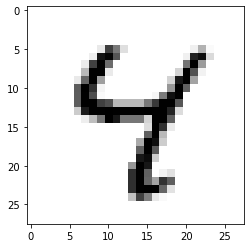

In [17]:
row = 6
digit = X_test_images_orig[row]

print('      Predicted Label = ', np.argmax(predictions[row]))

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()